In [68]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

In [69]:
df=pd.read_csv("height-weight.csv")
print(df)

    Weight  Height
0       45     120
1       58     135
2       48     123
3       60     145
4       70     160
5       78     162
6       80     163
7       90     175
8       95     182
9       78     170
10      82     176
11      95     182
12     105     175
13     100     183
14      85     170
15      78     177
16      50     140
17      65     159
18      76     150
19      87     167
20      45     129
21      56     140
22      72     160


Text(0.5, 1.0, 'Height vs Weight')

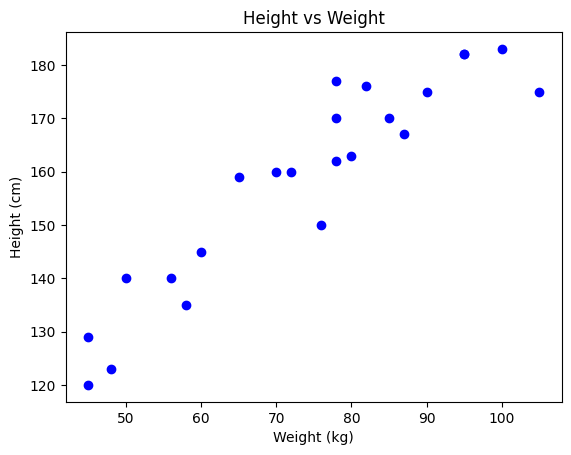

In [70]:
plt.scatter(df["Weight"], df["Height"], color="blue")
plt.xlabel("Weight (kg)")
plt.ylabel("Height (cm)")
plt.title("Height vs Weight")

In [71]:
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


In [72]:
X=df[["Weight"]] #Independent variable (needs to be in a 2d array form)
X.head()
Y=df["Height"] #dependent variable ( needs to be in 1d series form)

In [73]:
import sklearn 


In [74]:
from sklearn.model_selection import train_test_split

In [75]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,train_size=0.8, test_size=0.2, random_state=42)

In [76]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((18, 1), (18,), (5, 1), (5,))

In [ ]:
#standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
print(X_train)
X_test=scaler.transform(X_test)
print(X_test)

[[ 1.73689094]
 [-0.92026952]
 [ 1.4542143 ]
 [ 0.21043706]
 [-1.48562281]
 [ 1.17153765]
 [-1.6552288 ]
 [-0.80719886]
 [-0.24184557]
 [ 0.0973664 ]
 [-1.37255215]
 [-1.03334018]
 [-0.12877492]
 [ 0.88886101]
 [ 0.43657837]
 [ 0.60618436]
 [ 0.71925502]
 [ 0.32350772]]
[[ 0.21043706]
 [ 0.21043706]
 [-1.6552288 ]
 [ 1.17153765]
 [-0.52452222]]


In [78]:
#apply simple linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [79]:
model.coef_, model.intercept_

(array([17.03440872]), np.float64(157.5))

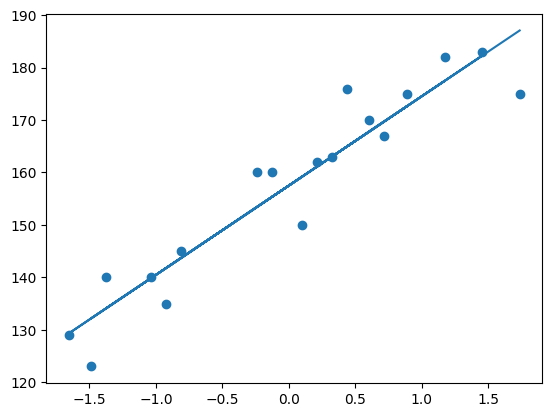

In [80]:
#plot best fit line wrt train data 
plt.scatter(X_train, Y_train)
plt.plot(X_train, model.predict(X_train))

In [81]:
#plot best fit line wrt test data 
Y_pred=model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
mse = mean_squared_error(Y_test, Y_pred)
mae= mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 109.77592599051664
Mean Absolute Error: 9.822657814519232
R^2 Score: 0.776986986042344


In [83]:
# #ols technique 4
# %pip install statsmodels
# import statsmodels.api as sm
# model=sm.OLS(Y_train, sm.add_constant(X_train))
# results=model.fit()
# print(results.summary())

In [84]:
#prediction for new data 
model.predict(scaler.transform([[72]]))


array([155.30639545])